In [2]:
import pandas as pd
import json
import re

# 4chan -> Low level moderation (moderation varies from board to board but in escence all illegal related content is removed), aside from ilegal content, the board is also moderated for spam and other types of abuse. The majority of speech aside from that is allowed.

## Cleaning text and performing a base level analysis

In [3]:
# lets transform the data into a pandas dataframe, currently it is stored in a dictionary of k=str, v=list[str]
# we will use the json module to load the data from the json file
with open('../Data/data_chan.json', 'r') as f:
    data = json.load(f)

# Create a pandas dataframe with 2 title and clean_comment columns
df = pd.DataFrame(columns=['title', 'comment'])

# Iterate through the dictionary and append the data to the dataframe
for title, comments in data.items():
    for comment in comments:
        df = df.append({'title': title, 'comment': comment}, ignore_index=True)

In [4]:
df.head()

title  \
0  All the cool kids are doing it.   
1  All the cool kids are doing it.   
2  All the cool kids are doing it.   
3  All the cool kids are doing it.   
4  All the cool kids are doing it.   

                                             comment  
0  &gt;&gt;400714173&gt;no pepe what are you doin...  
1  &gt;&gt;400708757https://www.youtube.com/watch...  
2  &gt;&gt;400713918&gt;if you don&#039;t like th...  
3  &gt;&gt;400708823And I wonder how many big ole...  
4  &gt;&gt;400714594Vatniggers get into the meat ...

In [5]:
# lets make some preeliminary analysis on the data with spacy
import spacy
nlp = spacy.load('en_core_web_md')

In [6]:
# clean the text from 'title' and 'clean_comment' columns
def clean_text(text):
    # make everything lowercase
    text = text.lower()
    # only lowercase letters no numbers or special characters
    text = re.sub(r'[^a-z]', ' ', text)
    # Remove any website links
    text = re.sub(r'http\S+', '', text)
    # only accept nouns, pronouns and entities
    doc = nlp(text)
    text = [token.text for token in doc if token.pos_ in ['NOUN', 'PROPN', 'PRON', 'ADJ'] and len(token.text) > 3 and 'quot' not in token.text]
    return text

In [7]:
# apply the clean_text function to the dataframe
# df['title'] = df['title'].apply(clean_text)
df['clean_comment'] = df['comment'].apply(clean_text)

In [8]:
df.shape

(12412, 3)

In [9]:
# remove clean_comments with less than 3 words
df = df[df['clean_comment'].apply(lambda x: len(x) > 3)]

In [10]:
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   

                                        clean_comment  
2   [richard, spencer, tier, opposition, ukrainian...  
3   [many, brains, titanic, imagery, their, meme, ...  
7                         [they, black, nobody, this]  
9   [bitch, your, good, women, physical, mental, h...  
13          [this, paper, everything, italy, crooked]

In [11]:
# lets create a new column with the length of the clean_comment
df['length'] = df['clean_comment'].apply(lambda x: len(x))

In [12]:
df.shape

(7116, 4)

## Sentiment and Subjectivity Analysis

In [13]:
# lets analyze the sentiment of the clean_comments
from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe('spacytextblob')

In [14]:
# lets create a new column with the sentiment of the clean_comment
df['sentiment'] = df['clean_comment'].apply(lambda x: nlp(' '.join(x))._.blob.polarity)

In [15]:
# lets plot the sentiment of the clean_comments
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.hist(df['sentiment'], bins=20)
plt.title('Sentiment Level of Comments', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [16]:
# 10 lowest sentiment comments
df.sort_values(by='sentiment').head(10)[['title', 'clean_comment', 'sentiment']]

title  \
1409                                      Save the kids!   
11722  elon is a seething retard who knows nothing ab...   
6620   &quot;A man killed his co-worker in their comp...   
485    what would you do if you had 24 hours to do wh...   
10975             How do you see your future white bros?   
6557   I don&#039;t find women that drink alcohol wee...   
7787   &gt; Seth Rogen deleted a tweet on Friday aski...   
2925   What causes the hive mind to do this?https://w...   
6432   What are the political geostrategic sociologic...   
1361   This world is full of hateful faggots ampersan...   

                                           clean_comment  sentiment  
1409     [anna, therepy, vaccine, antivax, boring, this]       -1.0  
11722             [twatter, real, retard, homey, fields]       -1.0  
6620   [your, faggot, what, pathetic, faggot, your, b...       -1.0  
485    [ewww, launch, code, night, freaky, taylor, tr...       -1.0  
10975                    [disgusting, mercy, your, soul]       -1.0  
6557   [overweight, fucks, what, nasty, cheese, your,...       -1.0  
7787     [some, internet, worst, bigots, ofwho, bigoted]       -1.0  
2925                      [loosh, harvest, this, insane]       -1.0  
6432                    [face, tampon, stance, horrible]       -1.0  
1361   [gene, therapy, demons, mark, beast, cruel, tr...       -1.0

In [17]:
# 10 highest sentiment comments
df.sort_values(by='sentiment', ascending=False).head(10)[['title', 'clean_comment', 'sentiment']]

title  \
6451  Friendly reminder that some of you faggots hav...   
4575  &gt;Didn&#039;t listen to music for a month or...   
8682                              Show me what you got.   
9264  Report the very last time you got vaxxed and i...   
5613  If whites, jews and chinks have the highest iq...   
3991  Human cloning unironically will save the white...   
2772  A time traveler sends you to the distant past ...   
7303                Ye made Christian music non-cringe.   
2674  It’s because are God’s chosen people. Jesus Ch...   
1995  Why do some anons think silver will end the Fe...   

                                          clean_comment  sentiment  
6451  [your, tranny, showingchecked, longmire, best,...        1.0  
4575                     [christ, best, your, portions]        1.0  
8682  [bottom, best, part, americans, jews, everythi...        1.0  
9264   [your, best, efforts, years, heartless, monster]        1.0  
5613  [they, spineless, street, shitters, that, need...        1.0  
3991  [meatbag, femoidcringe, immortal, perfect, rob...        1.0  
2772             [chamber, thing, perfect, sense, they]        1.0  
7303  [ultralight, beam, wonderful, song, muslim, them]        1.0  
2674  [bertrand, comparet, best, bitchute, video, tv...        1.0  
1995  [bars, perfect, size, medium, sized, purchases...        1.0

In [18]:
# lets create a new column with the subjectivity of the clean_comment
df['subjectivity'] = df['clean_comment'].apply(lambda x: nlp(' '.join(x))._.blob.subjectivity)

In [19]:
# lets plot the subjectivity of the clean_comments
plt.figure(figsize=(20, 10))
plt.hist(df['subjectivity'], bins=20)
plt.title('Subjectivity of the clean_comments', fontsize=20, fontweight='bold')
plt.xlabel('Subjectivity', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [20]:
# 10 most subjective comments
df.sort_values(by='subjectivity', ascending=False).head(10)[['title', 'clean_comment', 'subjectivity']]

title  \
9194   PRESIDENT DONALD J TRUMP @POTUS45https://www.d...   
11376  Aaron Carter&#039;s last tweet:&gt;Yo Kanye le...   
8011                           Is it ever going to stop?   
1074   I literally have a beautiful place to live, bu...   
7035   Do they think they are going to stop following...   
1075   I literally have a beautiful place to live, bu...   
3259                                  Is this plausible?   
11374  Aaron Carter&#039;s last tweet:&gt;Yo Kanye le...   
3256                                  Is this plausible?   
3242   Mhm. Guess taking the jab wasn&#039;t such a g...   

                                           clean_comment  subjectivity  
9194           [they, republicans, this, ways, possible]           1.0  
11376                      [stfu, ugly, nosed, subhuman]           1.0  
8011                          [chan, only, place, truth]           1.0  
1074   [beautiful, place, beautiful, place, beautiful...           1.0  
7035              [christkike, anglo, world, disgusting]           1.0  
1075                  [beautiful, place, rentoid, yours]           1.0  
3259                       [that, excuses, guilty, part]           1.0  
11374  [filthy, golems, thralls, feet, your, masters,...           1.0  
3256   [jong, number, they, moron, that, favourite, d...           1.0  
3242   [cute, baitcdc, antibodiesbq, vaxx, antibodies...           1.0

93248


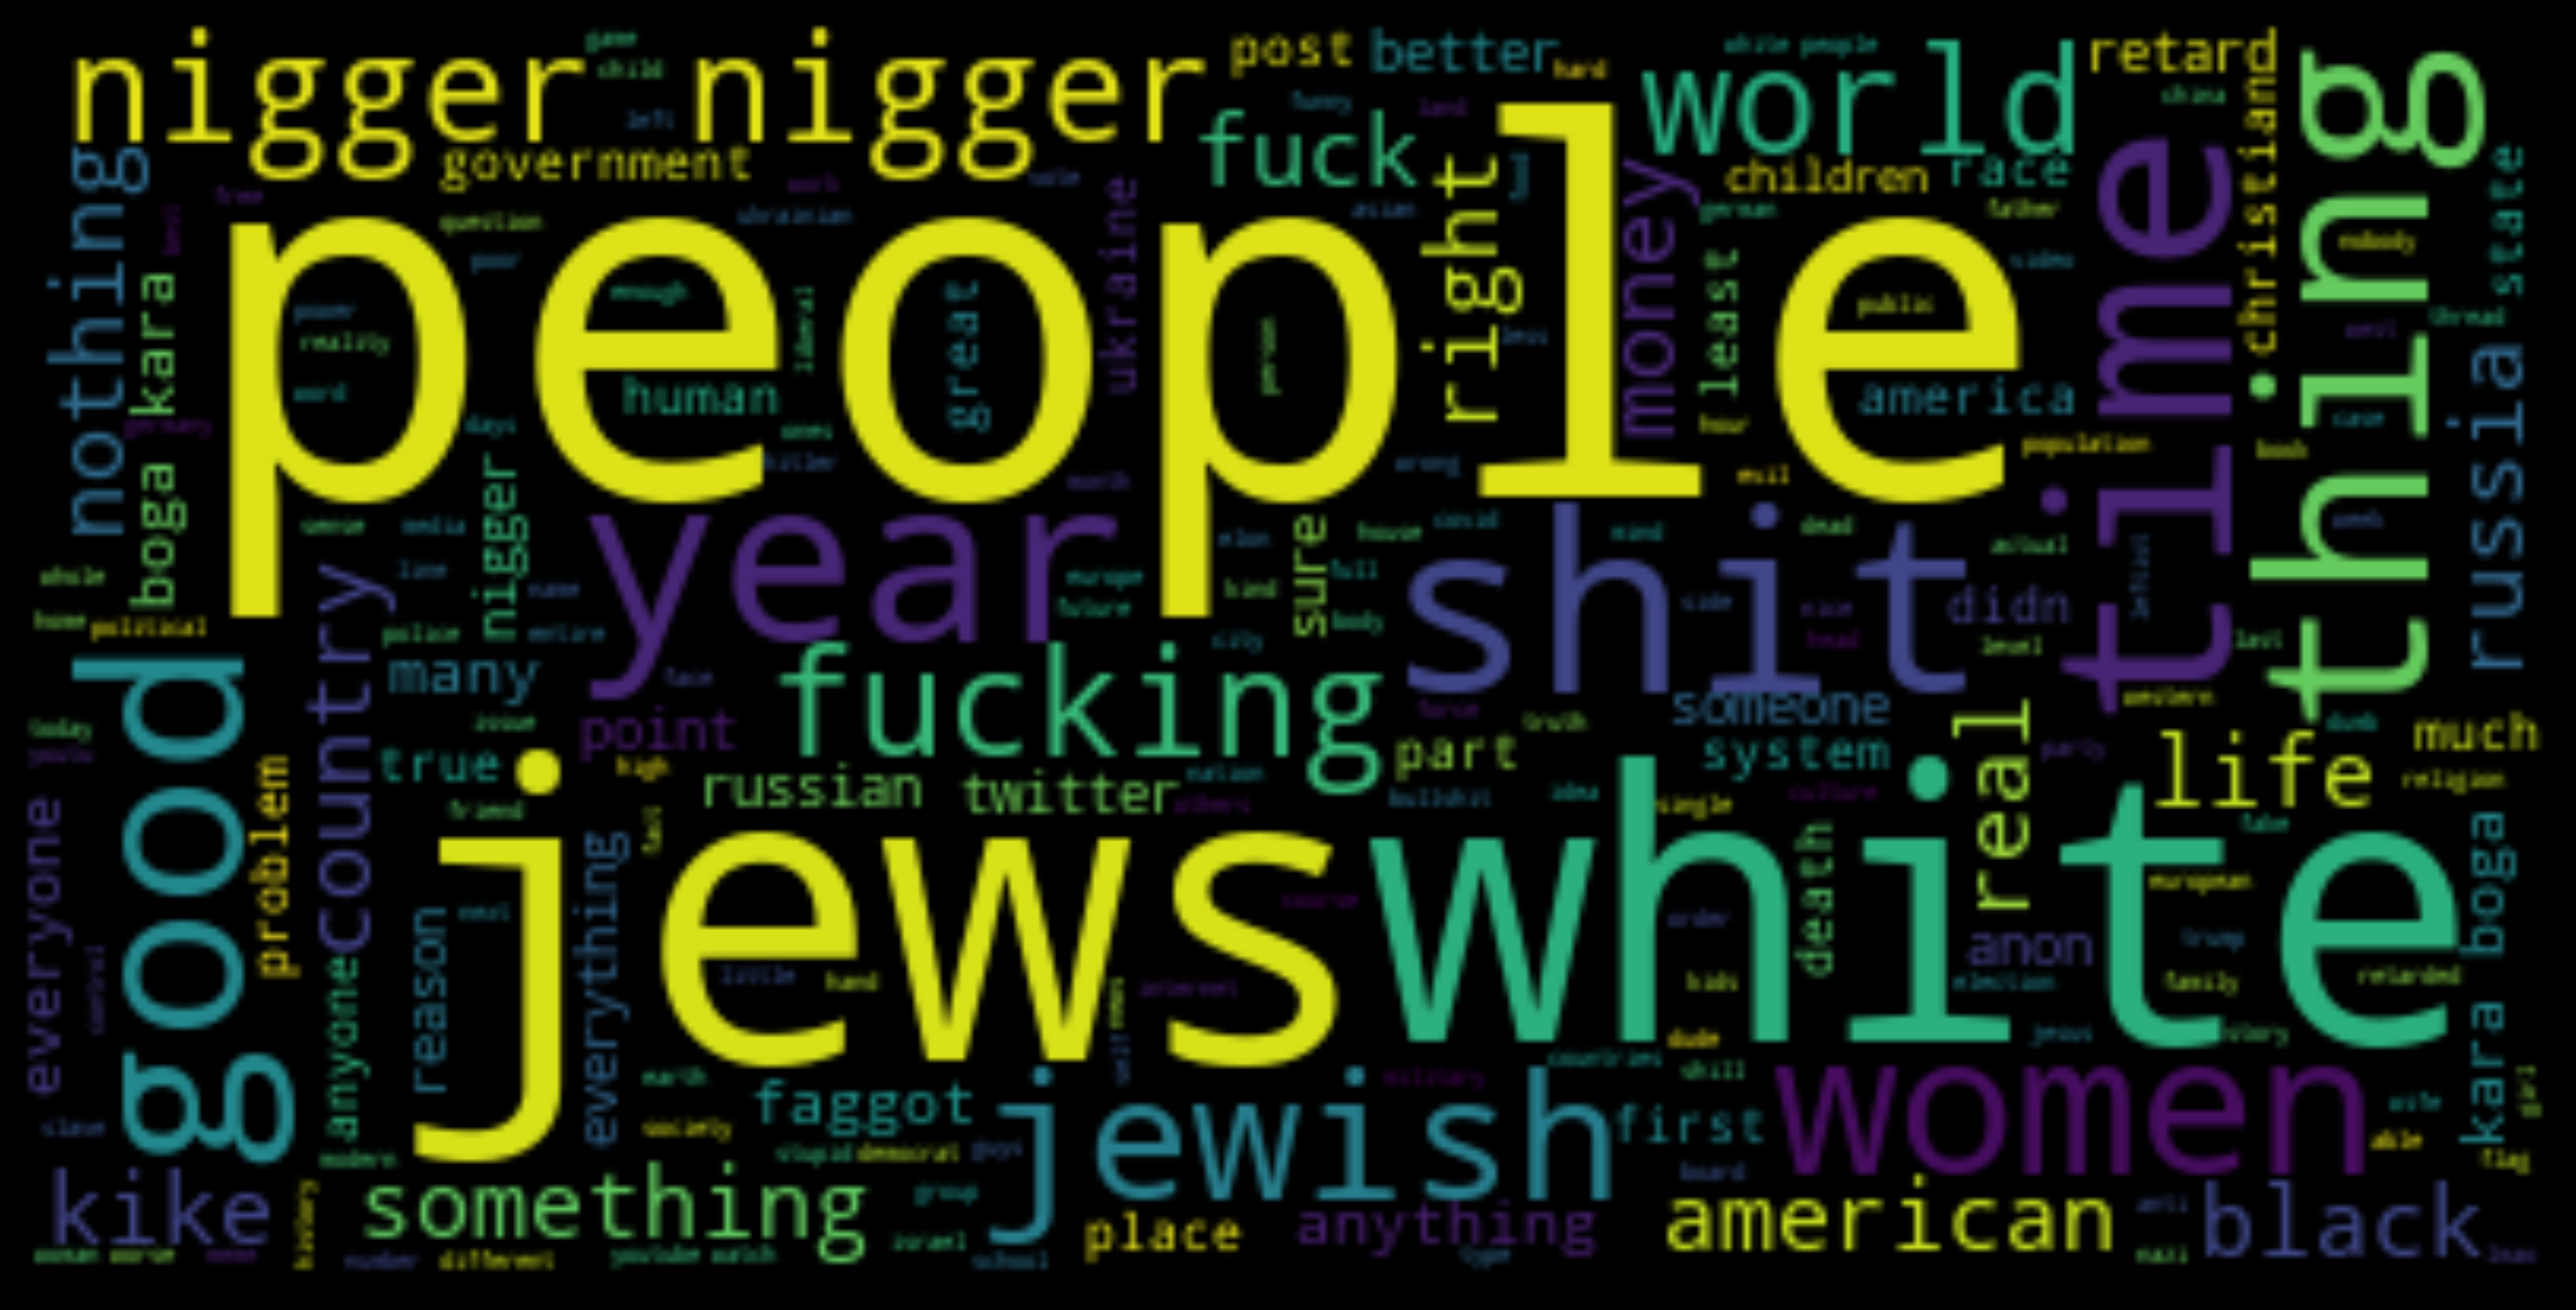

In [21]:
# lets create a word cloud of the most common words in the clean_comments
from wordcloud import WordCloud

# create a string of all the clean_comments
all_clean_comments = list()
for clean_comment in df['clean_comment']:
    all_clean_comments.extend(clean_comment)

print(len(all_clean_comments)) # the number of unique words in the clean_comments

# create a word cloud object
wordcloud = WordCloud().generate(' '.join(all_clean_comments))

# plot the word cloud, make it larger
plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

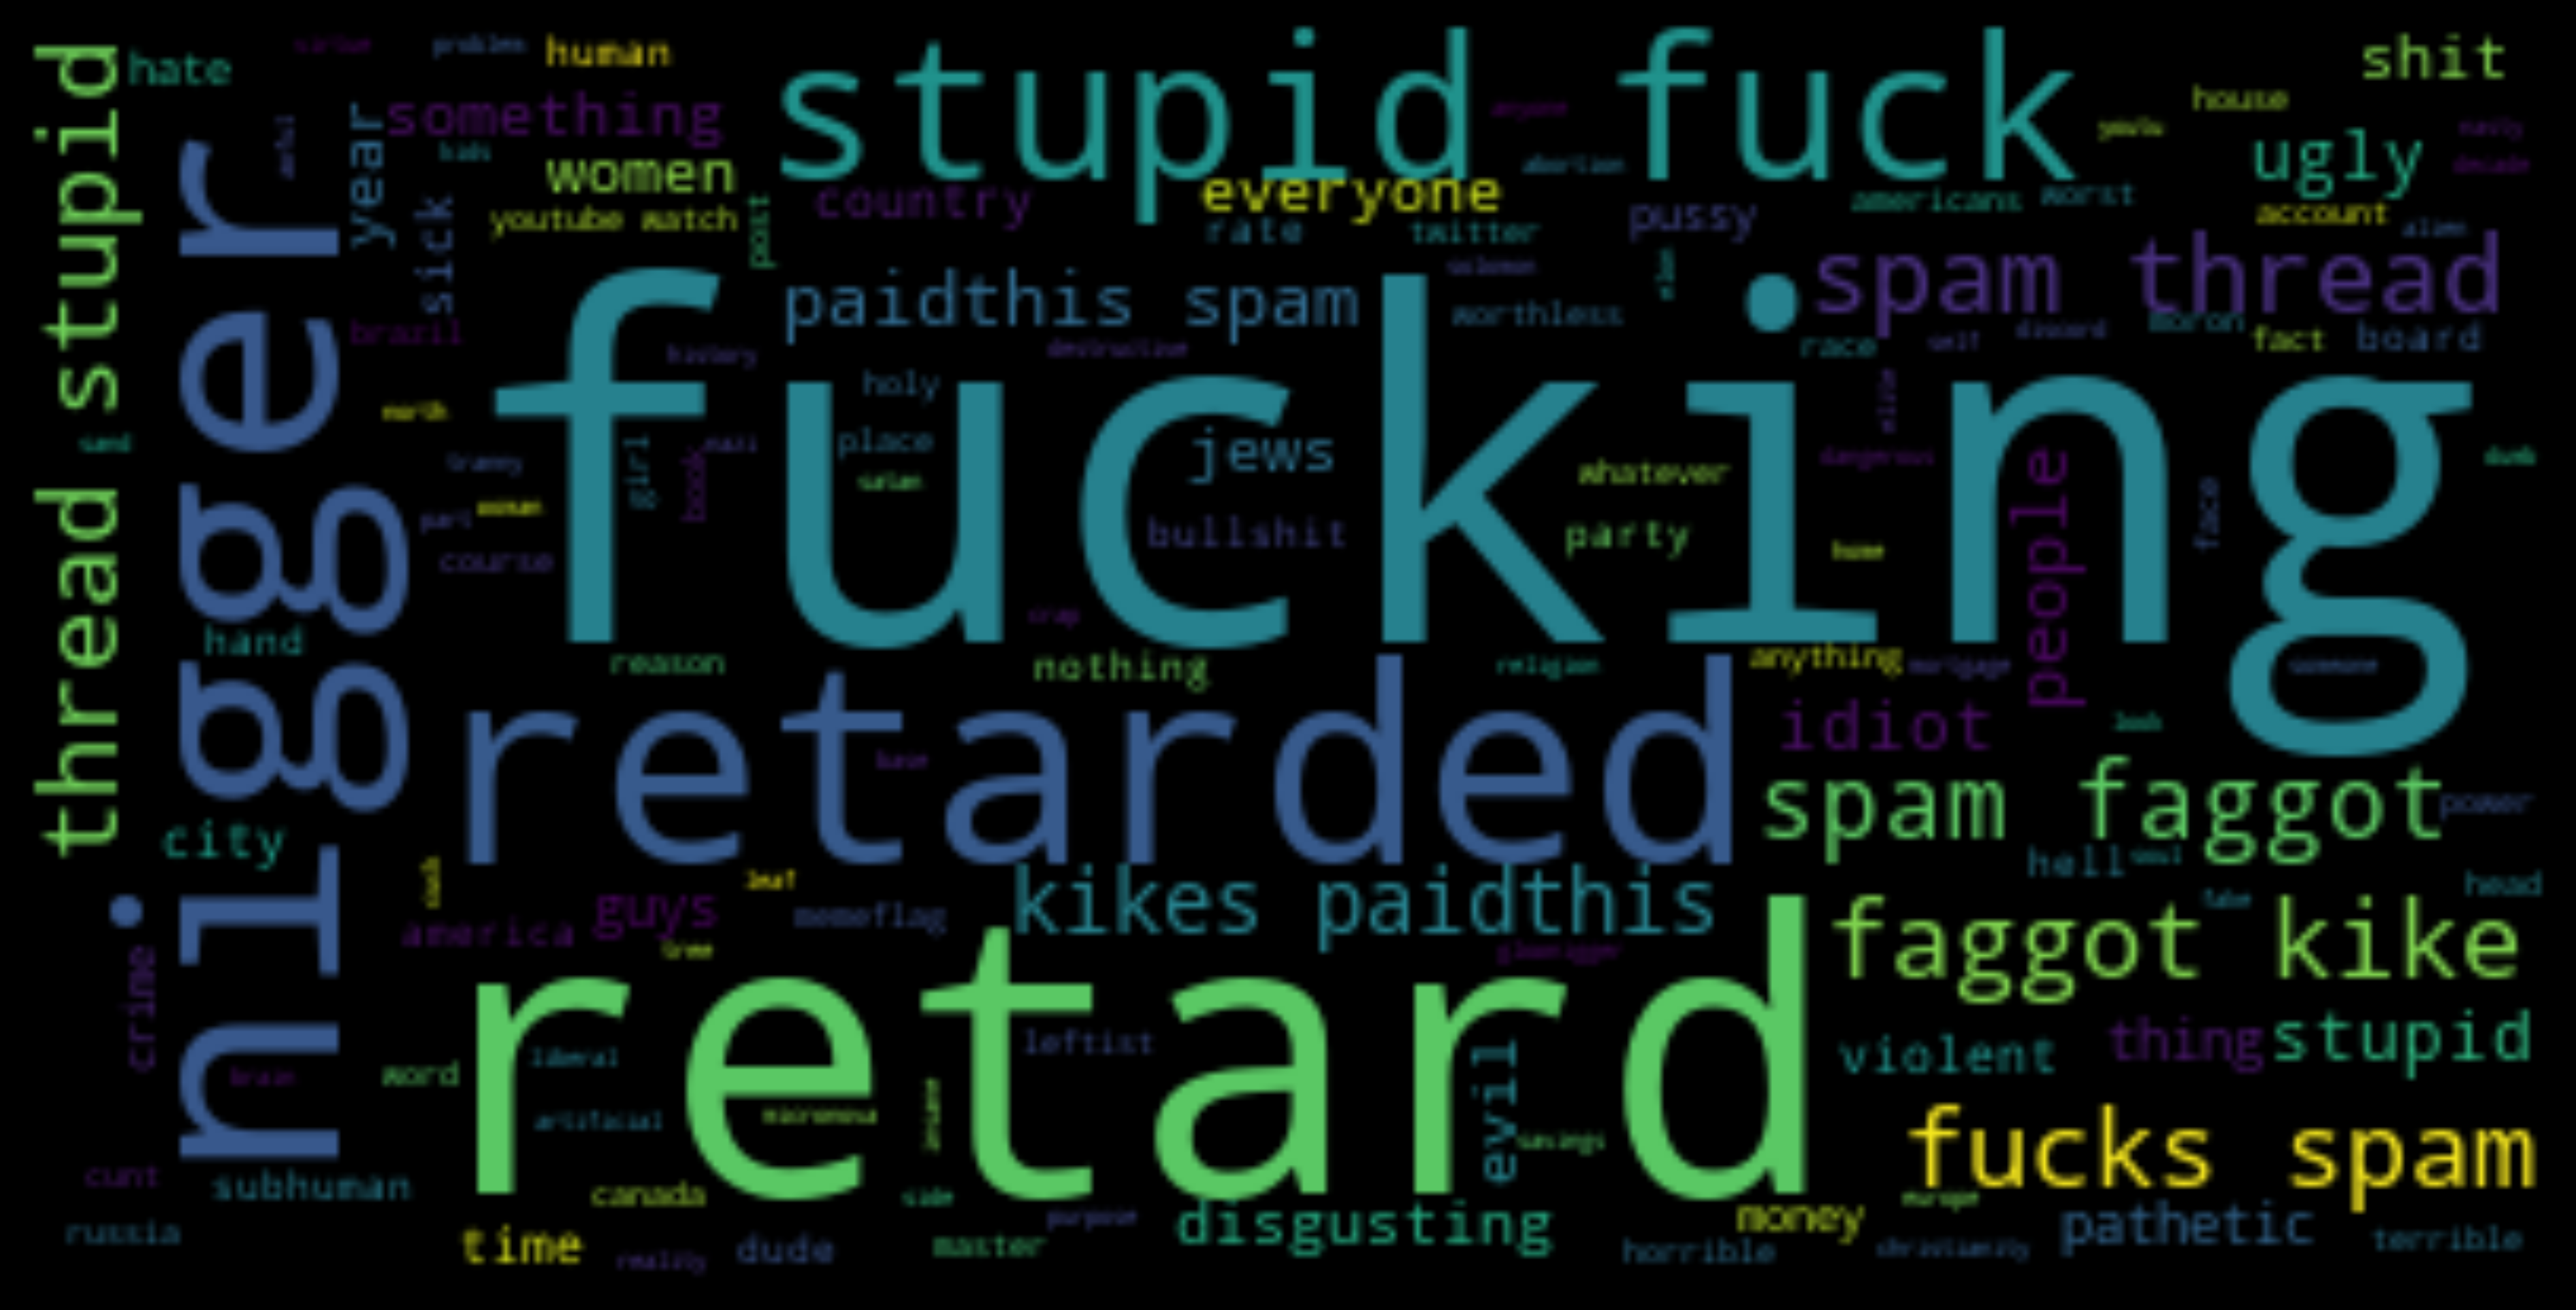

In [22]:
# lets create a word cloud of the most common words in the clean_comments, but only for negative clean_comments
negative_clean_comments = ' '.join(df[df['sentiment'] < -0.5]['clean_comment'].apply(lambda x: ' '.join(x)))

# create a word cloud object
wordcloud = WordCloud().generate(negative_clean_comments)

plt.figure(figsize=(15,10), facecolor='k', dpi=320, edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# check how many unique words are in the clean_comments
total_unique = len(all_clean_comments)

total_words = 0
for clean_comment in df['clean_comment']:
    total_words += len(clean_comment)

# average unique words per clean_comment
unique_words_by_clean_comment = total_unique / total_words
unique_words_by_clean_comment

1.0

In [24]:
total_words

93248

In [25]:
# check how many average words are in the clean_comments
average_words_by_clean_comment = sum(df['length']) / len(df)
average_words_by_clean_comment

13.103991006183248

## Hate Analysis in 4chan: A Case Study
### We scraped data from -> https://en.wikipedia.org/wiki/List_of_ethnic_slurs to generate a hate term corpus which then we used to calculate hate scores for each post in 4chan. Then we calculated the hate score for each thread and plotted the results.

In [26]:
# load the 2 other data frames to check on hate speech
df_hate = pd.read_csv('../../GeneralData/ethnic_slurs.csv')
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                      north america    
1                                          east asia    
2                             south asians in the us    
3                       middle east and north africa    
4                                          australia    
5                                      united states    
6                                          hong kong    
7                                      united states    
8   united states more commonly used in states whe...   
9            serbocroatian alpski srbin exyugoslavia    
10                                malaysia singapore    
11                                     north america    
12                                    french english    
13                                     united states    
14                                     north america    
15                                            israel    
16                                    united kingdom    
17                                     united states    
18                                         indonesia    
19                                            israel    

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [27]:
# r strip Location column
df_hate['Location'] = df_hate['Location'].apply(lambda x: x.rstrip())
df_hate.head(20)

Term  \
0                                     abbie abe abie    
1                                                abc    
2                                               abcd    
3                                   abidabeed plural    
4                                            aboabbo    
5   afro engineering african engineering or nigger...   
6                                            ah chah    
7                                           ali baba    
8                          alligator bait gator bait    
9                                        alpine serb    
10                                            ang mo    
11                                               ann    
12                                    annamite mites    
13                                               ape    
14                                             apple    
15                                   arabush aravush    
16                                argieargies plural    
17                                              armo    
18                                       asing aseng    
19                                         ashkenazi    

                                             Location  \
0                                       north america   
1                                           east asia   
2                              south asians in the us   
3                        middle east and north africa   
4                                           australia   
5                                       united states   
6                                           hong kong   
7                                       united states   
8   united states more commonly used in states whe...   
9             serbocroatian alpski srbin exyugoslavia   
10                                 malaysia singapore   
11                                      north america   
12                                     french english   
13                                      united states   
14                                      north america   
15                                             israel   
16                                     united kingdom   
17                                      united states   
18                                          indonesia   
19                                             israel   

                                               Target  \
0                                         jewish men    
1   americanborn chinese han or other chinese incl...   
2   americanborn confused desi indian americans or...   
3                               black african people    
4                       australian aboriginal person    
5                              black american people    
6                                 south asian people    
7                                       iraqi people    
8             black people especially black children    
9                         people of slovenian origin    
10           european people especially dutch people    
11               white women whiteacting black women    
12                                 vietnamese people    
13                                      black people    
14                                  native americans    
15                                             arabs    
16                                  argentine people    
17                         armenianarmenian american    
18    nonindonesian people especially chinese people    
19                                    ashkenazi jews    

                                              Meaning  
0   originated before the 1950s from the proper na...  
1   the term implies an otherness or lack of conne...  
2   used chiefly by south asian immigrants to impl...  
3   arabic for slave associated with the arab slav...  
4   originally this was simply an informal term fo...  
5   shoddy secondrate or unconventional makeshift ...  
6   from cantonese yale ach from acch meaning good...  
7      

In [28]:
# make a set of all unique words in Term 
hate_terms = set()
for term in df_hate['Term']:
    for word in term.split():
        if len(word) < 4:
            continue
        hate_terms.add(word)

In [29]:
# check if the clean_comments contain any of the hate words
hate_score = []
for clean_comment in df['clean_comment']:
    hate_count = 0
    for content in clean_comment:
        for word in hate_terms:
            if word in content:
                hate_count += 1

    hate_score.append(hate_count)

# add the hate score to the dataframe
df['hate_score'] = hate_score
df.head()
                

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  
2       0.300000           1  
3       0.650000           0  
7       0.433333           1  
9       0.314286           0  
13      0.100000           0

In [30]:
df.head(20)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   
21  If the Russians haven&#039;t adequately mainta...   
22  If the Russians haven&#039;t adequately mainta...   
24  If the Russians haven&#039;t adequately mainta...   
25  How are /pol/‘s paranoid schizos explaining th...   
26  Kanye West is a controlled opposition deceiver...   
27  Kanye West is a controlled opposition deceiver...   
29  Kanye West is a controlled opposition deceiver...   
31  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
33  Previous: &gt;&gt;400700588Timeline /tug/: htt...   
34  Previous: &gt;&gt;400700588Timeline /tug/: htt...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   
14  &gt;&gt;400714679&gt;Leftists couldn&#039;t ca...   
16  &gt;&gt;400714073&quot;real&quot; economies of...   
17  &gt;&gt;400713808The window was every 10 years...   
18  &gt;&gt;400707951Yes, today&#039;s sovereign d...   
19  &gt;&gt;400707951&gt;Companies do scummy shit ...   
21  &gt;&gt;400714692&gt;&gt;400714632jajajaja go ...   
22  &gt;&gt;400709829&gt;If the Russians haven&#03...   
24  &gt;&gt;400714725&gt;false premise A (&#039;&#...   
25  Israel is now damned if they do damned if they...   
26  &gt;&gt;400710442gematriaeffect.newsgematrinat...   
27  &gt;&gt;400714657Ok? All I did was mock a fagg...   
29  &gt;&gt;400714791&gt;Say X or you’re a kike&gt...   
31  &gt;&gt;400714721Fuck off blackie, go back.&gt...   
33  &gt;&gt;400714526I&#039;ll say an even more ex...   
34  &gt;&gt;400714829They&#039;re protected under ...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   
21  [jajajaja, your, dick, retarded, piece, shit, ...       7  -0.500000   
22  [russians, nuclear, triad, country, bankrupt, ...      36  -0.166667   
24           [false, premise, russian, army, ukraine]       5  -0.200000   
25  [israel, damned, they, they, they, ways, sabbath]       7   0.000000   
26  [gematriaeffect, newsgematrinator, comfreetofi...       4   0.000000   
27  [faggot, that, need, favorite, celebrity, that...       9   0.250000   
29           [kike, anon, kikeholy, pathetic, topkek]       5  -1.000000   
31  [blackie, they, there, riots, year, good, time...       8   0.700000   
33  [exciting, fact, there, wild, concept, mutt, c...      16   0.027778   
34    [they, laws, niggers, place, private, security]       6   0.000000   

    subjectivity  hate_score  
2       0.300000        

In [31]:
# Get the percentage of hate score devided by the total length of the clean_comment
df['hate_score_percentage'] = df['hate_score'] / df['length'] * 100
df.head()

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   

    subjectivity  hate_score  hate_score_percentage  
2       0.300000           1                   12.5  
3       0.650000           0                    0.0  
7       0.433333           1                   25.0  
9       0.314286           0                    0.0  
13      0.100000           0                    0.0

In [32]:
# get the top 5 rows with the highest hate score
df.sort_values(by='hate_score_percentage', ascending=False).head(10)[['comment' ,'clean_comment', 'hate_score_percentage']]

comment  \
4983   &gt;&gt;NIGGER_NIGGER_________NIGGER____NIGGER...   
7416   &gt;&gt;402736990&gt;white nigger&gt;black nig...   
3765   &gt;&gt;402154316NIGGER..............NIGGERNIG...   
9668   &gt;&gt;402895397NIGGER NIGGER NIGGER NIGGER N...   
4491     &gt;&gt;402191739&gt;goyim, goyim, goyim, goyim   
9263   &gt;&gt;402780357NiggerNigger nigger nigger, n...   
1940   &gt;&gt;401929006we need a White male and Japa...   
8143   &gt;&gt;402761807I don&#039;t care what happen...   
10133  &gt;&gt;403035717&gt;shiteyed yellow niggers&g...   
10245  &gt;&gt;403033931jews aren&#039;t White, and n...   

                                           clean_comment  \
4983   [nigger, nigger, nigger, nigger, nigger, nigge...   
7416                   [white, nigger, black, niggeryes]   
3765   [nigger, niggerniggerniggernigger, niggernigge...   
9668   [nigger, nigger, nigger, nigger, nigger, nigge...   
4491                        [goyim, goyim, goyim, goyim]   
9263   [niggernigger, nigger, nigger, niggernigger, n...   
1940     [white, male, japanese, korean, female, thread]   
8143   [what, sandniggers, sandnigger, countries, pro...   
10133                 [shiteyed, yellow, niggers, white]   
10245                   [jews, white, disgusting, kikes]   

       hate_score_percentage  
4983              100.000000  
7416              100.000000  
3765              100.000000  
9668              100.000000  
4491              100.000000  
9263               90.909091  
1940               83.333333  
8143               80.000000  
10133              75.000000  
10245              75.000000

### Percentage of Hate Score out of total clean_comments -> 6.02%

In [33]:
# get the sum of the total hate score / sum of the total length of the clean_comment * 100
percentage_total_hate = df['hate_score'].sum() / df['length'].sum() * 100
f"{percentage_total_hate:.2f}%"

'6.08%'

In [34]:
# get the top 5 rows with the highest hate score percentage, where length > 5
df[df['length'] > 5].sort_values(by='hate_score_percentage', ascending=False).head(7)

title  \
9668   What did Kanye mean by this, is /pol/ comprise...   
3765                          What do I put on it /pol/?   
4983   He is mostly known for not being Michael Jorda...   
9263   I repeat REDDIT IS DOWNI don&#039;t use other ...   
1940   Intredasting we are not having BBC treads righ...   
10841  South Africa: puts up big fence and fears nigg...   
7887   He says that Jews are racially superior to all...   

                                                 comment  \
9668   &gt;&gt;402895397NIGGER NIGGER NIGGER NIGGER N...   
3765   &gt;&gt;402154316NIGGER..............NIGGERNIG...   
4983   &gt;&gt;NIGGER_NIGGER_________NIGGER____NIGGER...   
9263   &gt;&gt;402780357NiggerNigger nigger nigger, n...   
1940   &gt;&gt;401929006we need a White male and Japa...   
10841  &gt;&gt;403035193I&#039;d rather live in a Wes...   
7887   &gt;&gt;402755419Well if you live around sandc...   

                                           clean_comment  length  sentiment  \
9668   [nigger, nigger, nigger, nigger, nigger, nigge...     156   0.000000   
3765   [nigger, niggerniggerniggernigger, niggernigge...      16   0.000000   
4983   [nigger, nigger, nigger, nigger, nigger, nigge...     113   0.000000   
9263   [niggernigger, nigger, nigger, niggernigger, n...      11   0.000000   
1940     [white, male, japanese, korean, female, thread]       6   0.000000   
10841  [west, niggers, western, hitler, american, ant...       9   0.000000   
7887   [sandcoons, easy, yourself, superior, brown, s...       7   0.566667   

       subjectivity  hate_score  hate_score_percentage  
9668       0.000000         156             100.000000  
3765       0.000000          16             100.000000  
4983       0.000000         113             100.000000  
9263       0.000000          10              90.909091  
1940       0.066667           5              83.333333  
10841      0.000000           6              66.666667  
7887       0.866667           4              57.142857

### Analysing offensive speech

In [35]:
# load csv as list
import csv
with open('../../GeneralData/offensive_words.csv', 'r') as f:
    reader = csv.reader(f)
    offensive_words = list(reader)[1:]

offensive_words = [word[0] for word in offensive_words]
offensive_words

['arse',
 'arsehead',
 'arsehole',
 'ass',
 'asshole',
 'bastard',
 'bithc',
 'bloody',
 'blood',
 'bollocks',
 'brotherfucker',
 'bugger',
 'bullshit',
 'childfucker',
 'cock',
 'cocksucker',
 'crap',
 'cunt',
 'damn',
 'dick',
 'dickhead',
 'dyke',
 'fatherfucker',
 'frigger',
 'fuck',
 'goddamn',
 'godsdamn',
 'hell',
 'holy shit',
 'horseshit',
 'jesus fuck',
 'kike',
 'motherfucker',
 'nigga',
 'nigra',
 'nigger',
 'piss',
 'prick',
 'pussy',
 'shit',
 'shit ass',
 'shite',
 'sisterfucker',
 'slut',
 'son of a bithc',
 'son of a whore',
 'spastic',
 'twat',
 'wanker']

In [36]:
# check if the clean_comments contain any of the offensive words
offensive_score = []
for clean_comment in df['clean_comment']:
    offensive_count = 0
    for content in clean_comment:
        for word in offensive_words:
            if word in content:
                offensive_count += 1

    offensive_score.append(offensive_count)

# add the offensive score to the dataframe
df['offensive_score'] = offensive_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   
14  &gt;&gt;400714679&gt;Leftists couldn&#039;t ca...   
16  &gt;&gt;400714073&quot;real&quot; economies of...   
17  &gt;&gt;400713808The window was every 10 years...   
18  &gt;&gt;400707951Yes, today&#039;s sovereign d...   
19  &gt;&gt;400707951&gt;Companies do scummy shit ...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  
2       0.300000           1              12.500000                0  
3       0.650000           0               0.000000                1  
7       0.433333           1              25.000000                0  
9       0.314286           0               0.000000                0  
13      0.100000           0               0.000000                0  
14      0.000000           4              23.529412                1  
16      0.150000           2              16.666667                0  
17      0.408333           1               9.090909                0  
18      0.500000           1               6.250000                0  
19      0.750000           2               7.142857                8

In [37]:
# Offensive score percentage
df['offensive_score_percentage'] = df['offensive_score'] / df['length'] * 100

In [38]:
# get the top 10 rows with the highest offensive score
df.sort_values(by='offensive_score_percentage', ascending=False).head(10)[['comment' ,'clean_comment', 'offensive_score_percentage']]

comment  \
3765   &gt;&gt;402154316NIGGER..............NIGGERNIG...   
4983   &gt;&gt;NIGGER_NIGGER_________NIGGER____NIGGER...   
9668   &gt;&gt;402895397NIGGER NIGGER NIGGER NIGGER N...   
9263   &gt;&gt;402780357NiggerNigger nigger nigger, n...   
5217   HeyHEY NIGGERPOST A FUCKING LINKYOU ARE A FUCK...   
3709   &gt;&gt;402159231this nigger is hella based.NG...   
10133  &gt;&gt;403035717&gt;shiteyed yellow niggers&g...   
2883   &gt;&gt;402030610No, but it’ll probably suck a...   
4651   &gt;&gt;402205375&gt;pol celebrating a niggery...   
7944   &gt;&gt;402752057No it is stupid fucking moron...   

                                           clean_comment  \
3765   [nigger, niggerniggerniggernigger, niggernigge...   
4983   [nigger, nigger, nigger, nigger, nigger, nigge...   
9668   [nigger, nigger, nigger, nigger, nigger, nigge...   
9263   [niggernigger, nigger, nigger, niggernigger, n...   
5217   [heyhey, fucking, linkyou, fucking, niggerfuck...   
3709                      [nigger, hella, niggers, this]   
10133                 [shiteyed, yellow, niggers, white]   
2883                          [less, kike, nigger, dick]   
4651         [niggeryou, nigger, niggerness, everything]   
7944   [stupid, fucking, moronic, nigger, faggot, kik...   

       offensive_score_percentage  
3765                   100.000000  
4983                   100.000000  
9668                   100.000000  
9263                    90.909091  
5217                    88.888889  
3709                    75.000000  
10133                   75.000000  
2883                    75.000000  
4651                    75.000000  
7944                    71.428571

In [39]:
percentage_total_offensive = df['offensive_score'].sum() / df['length'].sum() * 100
f"{percentage_total_offensive:.2f}%"

'3.74%'

### Violence Analysis

In [40]:
# Read Csv as list
with open('../../GeneralData/violent_words.csv', 'r') as f:
    reader = csv.reader(f)
    violent_words = list(reader)[1:]

violent_words = [word[0] for word in violent_words]
violent_words

['acid',
 'aggressor',
 'agitator',
 'aim',
 'alert',
 'ambush',
 'ammunition',
 'anarchy',
 'anguish',
 'annihilate',
 'apartheid',
 'arms',
 'arsenal',
 'artillery',
 'assassin',
 'assassinate',
 'assault',
 'atrocity',
 'attack',
 'authority',
 'automatic',
 'faction',
 'fanatic',
 'fatal',
 'fear',
 'fearful',
 'felon',
 'ferment',
 'ferocious',
 'feud',
 'fierce',
 'fiery',
 'fight',
 'fighter',
 'force',
 'forceful',
 'forces',
 'fray',
 'frenzy',
 'front',
 'lines',
 'fuel',
 'fugitive',
 'furtive',
 'cadaver',
 'camouflage',
 'campaign',
 'captive',
 'capture',
 'careen',
 'carnage',
 'casualties',
 'cataclysm',
 'causes',
 'chaos',
 'charge',
 'charred',
 'checking',
 'clandestine',
 'clash',
 'coalition',
 'collapse',
 'combat',
 'commandos',
 'concentration',
 'concussion',
 'conflagration',
 'conflict',
 'confrontation',
 'conquer',
 'consequences',
 'consolidate',
 'conspiracy',
 'conspire',
 'control',
 'coordinates',
 'corpse',
 'counterattack',
 'countermand',
 'crash',

In [41]:
# check if the clean_comments contain any of the violent words
violent_score = []
for clean_comment in df['clean_comment']:
    violent_count = 0
    for content in clean_comment:
        for word in violent_words:
            if word in content:
                violent_count += 1

    violent_score.append(violent_count)

# add the violent score to the dataframe
df['violent_score'] = violent_score
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   
14  &gt;&gt;400714679&gt;Leftists couldn&#039;t ca...   
16  &gt;&gt;400714073&quot;real&quot; economies of...   
17  &gt;&gt;400713808The window was every 10 years...   
18  &gt;&gt;400707951Yes, today&#039;s sovereign d...   
19  &gt;&gt;400707951&gt;Companies do scummy shit ...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    offensive_score_percentage  violent_score  
2                     0.000000              2  
3                    11.111111              1  
7                     0.000000              0  
9                     0.000000              0  
13                    0.000000              0  
14                    5.882353              3  
16                    0.000000              1  
17                    0.000000              0  
18                    0.000000              1  
19                   28.571429              5

In [42]:
# Add Violent score percentage
df['violent_score_percentage'] = df['violent_score'] / df['length'] * 100

In [43]:
percentage_total_violent = df['violent_score'].sum() / df['length'].sum() * 100
f"{percentage_total_violent:.2f}%"

'6.97%'

In [44]:
# Lets sample the top 10 violent clean_comments
df.sort_values(by='violent_score_percentage', ascending=False).head(10)[['comment' ,'clean_comment', 'violent_score_percentage']]

comment  \
6052   &gt;&gt;402288547No it&#039;s a real syrian re...   
8163   &gt;&gt;402771950Charge it with battery and as...   
8154   &gt;&gt;402772254The first soldier gets the ri...   
2272   &gt;&gt;401924541(((You))) are gay and need to...   
7579   &gt;&gt;402754696why aren’t you on the front l...   
11305  &gt;&gt;403052041because ukrainian forces (nat...   
1422   &gt;&gt;401160492&gt;Both pilots that were in ...   
5813   &gt;&gt;402237731Neither. Scared people do sca...   
11591  &gt;&gt;403062612&gt;Black ruleIf its anarchy ...   
12152  &gt;&gt;403065856im not sure its a soldier, th...   

                                           clean_comment  \
6052                      [real, syrian, rebel, fighter]   
8163                  [battery, assault, deadly, weapon]   
8154   [first, soldier, rifle, second, soldier, chaps...   
2272         [your, opposition, control, sabotage, them]   
7579                   [front, lines, ivan, arrow, knee]   
11305          [ukrainian, forces, nato, subhuman, they]   
1422   [pilots, that, plane, impact, russians, fighte...   
5813                      [scared, people, scared, shit]   
11591                     [black, ruleif, anarchy, rule]   
12152  [sure, soldier, they, coordinates, military, t...   

       violent_score_percentage  
6052                 125.000000  
8163                 100.000000  
8154                  83.333333  
2272                  80.000000  
7579                  80.000000  
11305                 80.000000  
1422                  75.000000  
5813                  75.000000  
11591                 75.000000  
12152                 71.428571

## Lets do some natural clustering analysis, let's see how many natural clusters we can find in the data

In [45]:
# Perform a natural clustering on the clean_comments
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# create a list of all the clean_comments
all_clean_comments = list()
for clean_comment in df['clean_comment']:
    all_clean_comments.append(' '.join(clean_comment))

# create a tfidf vectorizer object
vectorizer = TfidfVectorizer(stop_words='english')

# fit the vectorizer to the clean_comments
X = vectorizer.fit_transform(all_clean_comments)

# create a kmeans object
kmeans = KMeans(n_clusters=5, random_state=0)

# fit the kmeans object to the vectorizer
kmeans.fit(X)

# get the cluster labels
labels = kmeans.labels_

# add the cluster labels to the dataframe
df['cluster'] = labels
df.head(10)

title  \
2                     All the cool kids are doing it.   
3                     All the cool kids are doing it.   
7   &gt;Two 16-year-old twins escaped from their a...   
9   &gt;Two 16-year-old twins escaped from their a...   
13  &gt;State Sen. Scott Wiener is mobilizing alli...   
14  As history our guide: they jack up prices, peo...   
16  This is what happens when you pay them $15 an ...   
17  This is what happens when you pay them $15 an ...   
18  This is what happens when you pay them $15 an ...   
19  This is what happens when you pay them $15 an ...   

                                              comment  \
2   &gt;&gt;400713918&gt;if you don&#039;t like th...   
3   &gt;&gt;400708823And I wonder how many big ole...   
7   &gt;&gt;400706508theyre black so nobody will h...   
9   &gt;&gt;400711306lol you got this bitch drinki...   
13  &gt;&gt;400712729Did you print this out on pap...   
14  &gt;&gt;400714679&gt;Leftists couldn&#039;t ca...   
16  &gt;&gt;400714073&quot;real&quot; economies of...   
17  &gt;&gt;400713808The window was every 10 years...   
18  &gt;&gt;400707951Yes, today&#039;s sovereign d...   
19  &gt;&gt;400707951&gt;Companies do scummy shit ...   

                                        clean_comment  length  sentiment  \
2   [richard, spencer, tier, opposition, ukrainian...       8   0.200000   
3   [many, brains, titanic, imagery, their, meme, ...       9   0.150000   
7                         [they, black, nobody, this]       4  -0.166667   
9   [bitch, your, good, women, physical, mental, h...       7   0.200000   
13          [this, paper, everything, italy, crooked]       5   0.000000   
14  [leftists, world, nuclear, hellscape, exchange...      17   0.000000   
16  [real, economies, western, nations, permanent,...      12   0.100000   
17  [window, years, last, less, drain, everyone, b...      11  -0.208333   
18  [today, sovereign, debt, crisis, itself, infla...      16   0.416667   
19  [companies, shit, mass, offs, shit, benefits, ...      28   0.008333   

    subjectivity  hate_score  hate_score_percentage  offensive_score  \
2       0.300000           1              12.500000                0   
3       0.650000           0               0.000000                1   
7       0.433333           1              25.000000                0   
9       0.314286           0               0.000000                0   
13      0.100000           0               0.000000                0   
14      0.000000           4              23.529412                1   
16      0.150000           2              16.666667                0   
17      0.408333           1               9.090909                0   
18      0.500000           1               6.250000                0   
19      0.750000           2               7.142857                8   

    offensive_score_percentage  violent_score  violent_score_percentage  \
2                     0.000000              2                 25.000000   
3                    11.111111              1                 11.111111   
7                     0.000000              0                  0.000000   
9                     0.000000              0                  0.000000   
13                    0.000000              0                  0.000000   
14                    5.882353              3                 17.647059   
16                    0.000000              1                  8.333333   
17                    0.000000              0                  0.000000   
18                    0.000000              1                  6.250000   
19                   28.571429              5                 17.857143   

    cluster  
2         0  
3         0  
7         0  
9         0  
13        0  
14        2  
16        0  
17        0  
18        0  
19        0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


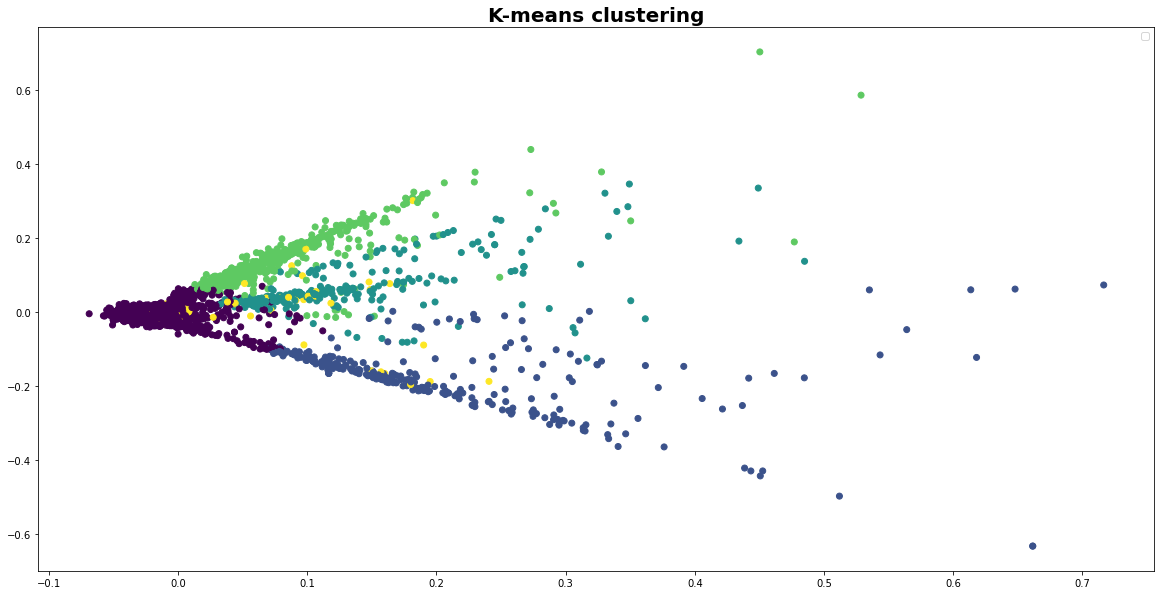

In [46]:
# Plot the clusters
from sklearn.decomposition import PCA

# create a pca object
pca = PCA(n_components=2)

# fit the pca object to the vectorizer
pca.fit(X.toarray())

# get the first two principal components
data2D = pca.transform(X.toarray())

# plot the clusters
plt.figure(figsize=(20,10))
plt.scatter(data2D[:,0], data2D[:,1], c=labels)
# Add legend, title and axis names
plt.legend()
plt.title('K-means clustering', fontsize=20, fontweight='bold')
plt.show()

In [47]:
# Check the top 10 words in each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(5):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

Cluster 0:
 shit
 time
 good
 women
 fuck
 fucking
 country
 world
 years
 thing


Cluster 1:
 jews
 jewish
 white
 people
 niggers
 blacks
 history
 whites
 shit
 russia


Cluster 2:
 white
 people
 whites
 niggers
 race
 women
 black
 jewish
 guys
 skin


Cluster 3:
 people
 shit
 good
 things
 time
 money
 black
 years
 world
 fuck


Cluster 4:
 nigger
 white
 kike
 fucking
 niggers
 stupid
 faggot
 dumb
 black
 flag




c:\Users\nicol\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
# Get 5 random clean_comments from each cluster
for i in range(5):
    print("Cluster %d:" % i)
    for clean_comment in df[df['cluster'] == i]['clean_comment'].sample(5):
        print(' '.join(clean_comment))
    print('\n')

Cluster 0:
sure butt election married kids more
anon your government legal military psyops their citizens congress bill congress house bill nancy
they call saturday male normal year bathtubno refunds
russia pants your nation criminal africans eyes this funny
bread games plebs goys


Cluster 1:
time good jews their house
jews they whites overpopulation meme that itself whites fruits their labour jesus your pealrs swine whites christian whites
they final form cuckoldry command jews your women foreigners everything
blacks jews that antisemitic
jews unlikely your great grandchildren what kikes


Cluster 2:
white male shirts them town
white guys first knowledge fact knob standards hard alone freedom whole better
white people spines public life wwii
white people impulse control problems similar niggers jappy they best brappies they white
retard white race jews twitter kanye rightwhites their blacks twitter white subhumans


Cluster 3:
immigrants ones that country good people
quality society 

## Hate Metrics Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


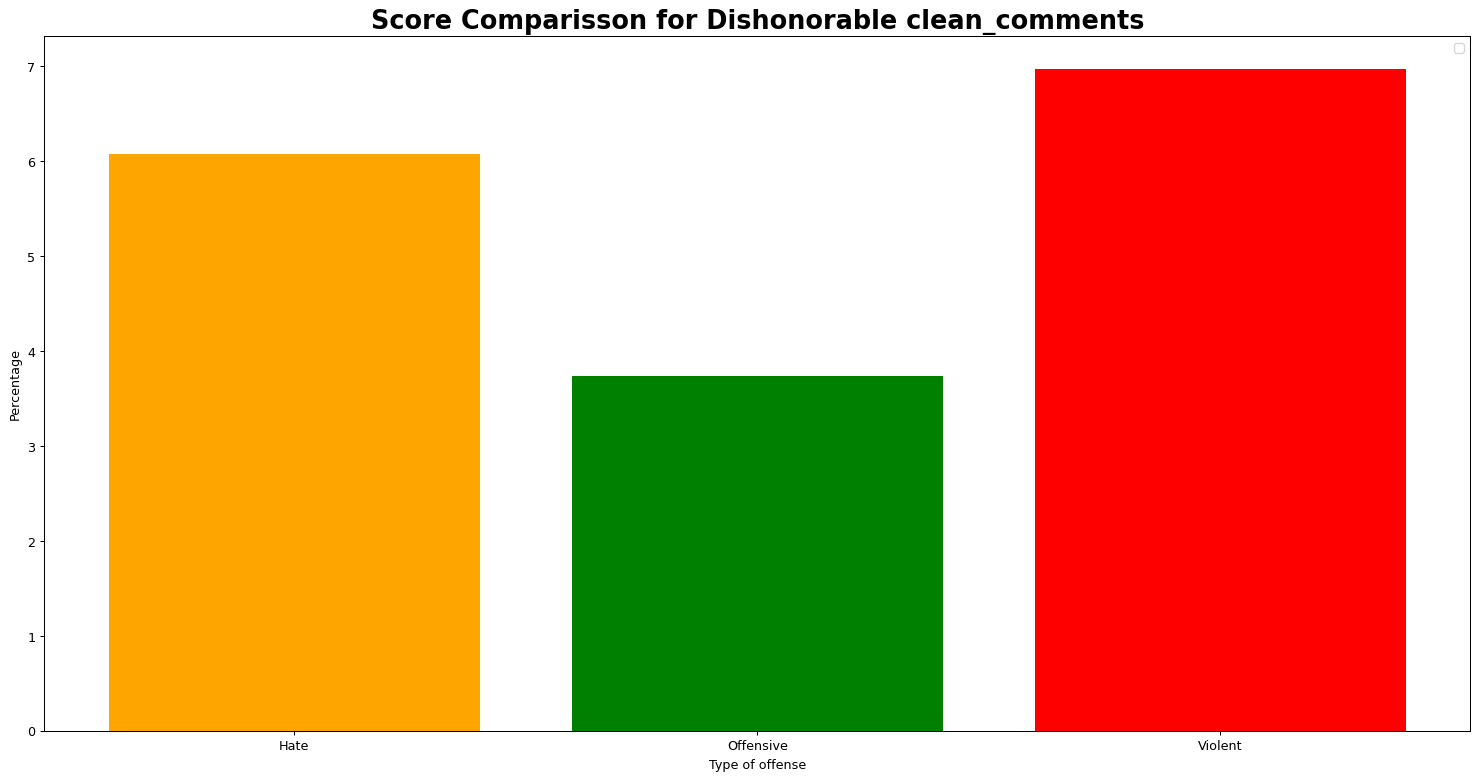

In [49]:
# lets do histogram of percentage of hate score, pct of offensive score, pct of violent score

values = [percentage_total_hate, percentage_total_offensive, percentage_total_violent]

plt.figure(figsize=(20,10), dpi= 92)
plt.bar(['Hate', 'Offensive', 'Violent'], values, color=['orange', 'green', 'red'])
plt.title('Score Comparisson for Dishonorable clean_comments', fontsize=20, fontweight='bold')
plt.xlabel('Type of offense')
plt.ylabel('Percentage')
plt.legend()
plt.show()